# Makemore

This is the most fundamental version of GPT built from scratch.

Here's the basic dataset we are trying to emulate

In [1]:
words = open('names.txt', 'r').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

Bigram model. Our context window is just 2 characters in a row.

$adam$

$ad$, $da$, $am$

In [2]:
for w in words[:2]:
	w = ['<S>'] + list(w) + ['<E>']
	for ch1, ch2 in zip(w, w[1:]):
		print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>


A simple way to do this is to just store all 2 letter combination and count the frequency.

```
bigram = {
	"ab": 4,
	"bc": 2,
	...
}
```

In [3]:
b = {}
for w in words:
	w = ['<S>'] + list(w) + ['<E>']
	for ch1, ch2 in zip(w, w[1:]):
		bigram = (ch1, ch2)
		b[bigram] = b.get(bigram, 0) + 1
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [4]:
sorted(b.items(), reverse=True, key = lambda x: x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

## A different way of visualizing frequency

Instead of using '\<S\>' and '\<E\>', we will just use a '.' instead. This'll reduce our memory usage as '.a' and 'a.' and '..' are possible and mean the same thing as before.

In [5]:
import torch

In [6]:
N = torch.zeros(27, 27, dtype=torch.int32)

Fancy way of just mapping letters to integers assuming all are lowercase.

In [7]:
alpha = '.abcdefghijklmnopqrstuvwxyz'
# char to int
ctoi = { x: i  for i, x in enumerate(alpha)}
# int to char
itoc = { i : x  for i, x in enumerate(alpha)}

ctoi


{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [8]:
for w in words:
	w = ["."] + list(w) + ["."]
	for ch1, ch2 in zip(w, w[1:]):
		N[ctoi[ch1], ctoi[ch2]] += 1
	

(-0.5, 26.5, 26.5, -0.5)

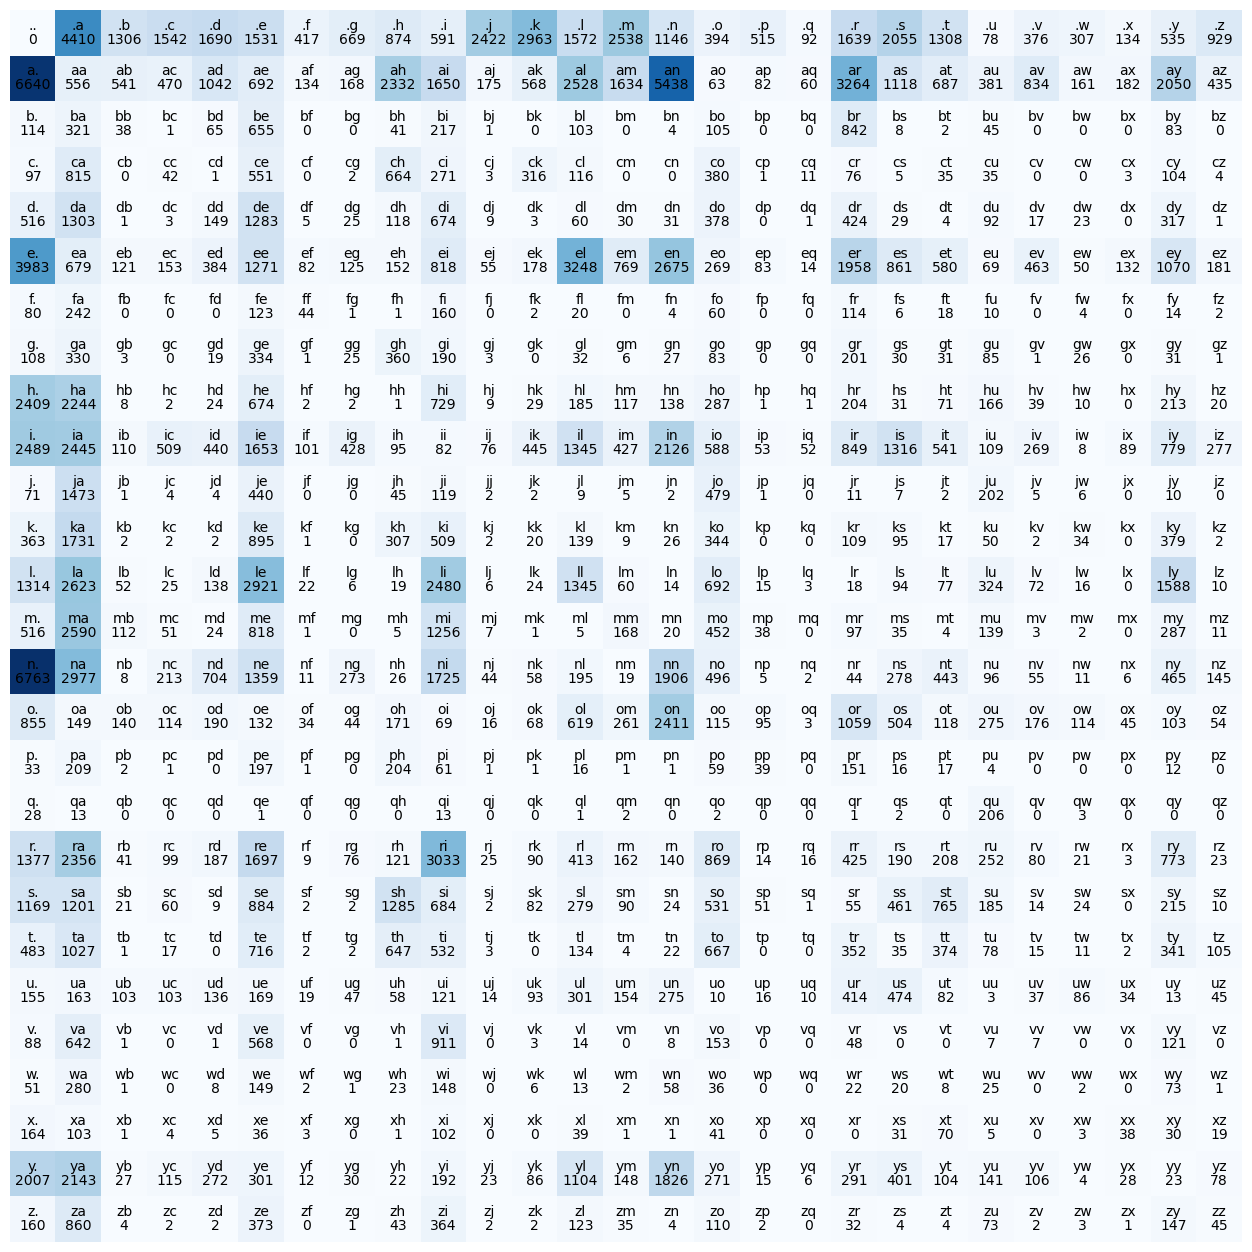

In [9]:
import matplotlib.pyplot as plot
plot.figure(figsize=(16, 16))
plot.imshow(N, cmap="Blues")
for i in range(27):
	for j in range(27):
		plot.text(j, i, itoc[i] + itoc[j], ha="center", va="bottom")
		plot.text(j, i, N[i, j].item(), ha="center", va="top")
plot.axis("off")

This is a simple probability distribution extracted from the dataset. We will then start just sampling from the distribution.

For example, here's the probability distribution for the first letter (the first row in the matrix above)

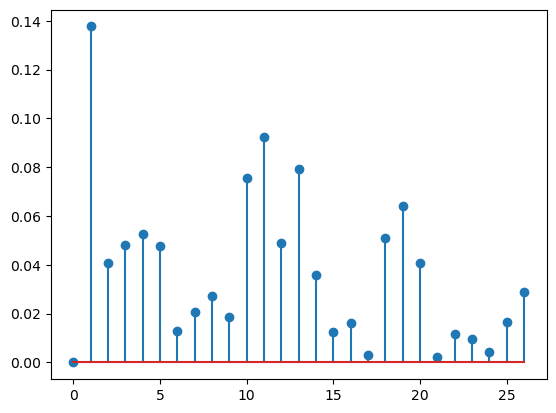

In [10]:
dist = N[0].float() / sum(N[0]).float()
plot.stem(range(27), dist)
plot.show()


We can start sampling the first row (which are the probabilities for the start letter). Then using the second letter, we start sampling the row that this letter corresponds to.

In [11]:
# Normalize the matrix
P = N.float()
P = P / P.sum(1, keepdim=True)
P[0].sum()

tensor(1.)

```
# axis = 0
[0, 1, 2, 3,]
```

```

## ===========> axis 1
[
	[0, 1, 2],          ||
	[0, 1, 2],          ||
	[0, 1, 2]          ||
]				        \/  axis 0
```
---
Broadcasting semantics. So pytorch will add an dimension to the one with the fewer dimension until they are the same dimension. `[27]` to `[1, 27]` to `[1,1,27]` for example

In [12]:
# use default seed
g = torch.Generator()

result = ""
char_int = 0 # start off on first row

while True:

	char_int = torch.multinomial(P[char_int], num_samples=1, replacement=True, generator=g).item()
	result += itoc[char_int]
	if itoc[char_int] == '.':
		break

result


'kodoleiyn.'

Yeah, not very great but works. Basic principle is established. Using a context window to create probability distribution. We can improve upon this model many folds.

### Loss function

Let's try to quantify the quality of this model. Let's use the negative log-likelihood


Basically

Log Likelihood $= log(x)$


/var/folders/vg/5vdppb7s63x_nslhxytqlt7r0000gn/T/ipykernel_38767/798512507.py:5: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


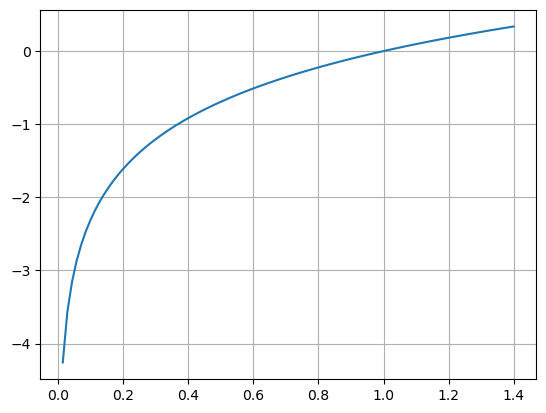

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1.4, 100)
y = np.log(x)

plt.grid()
plt.plot(x, y)

Here smaller numbers are "bad"

### Negative log-likelihood
We can correct this

/var/folders/vg/5vdppb7s63x_nslhxytqlt7r0000gn/T/ipykernel_38767/4053214376.py:5: RuntimeWarning: divide by zero encountered in log
  y = -np.log(x)


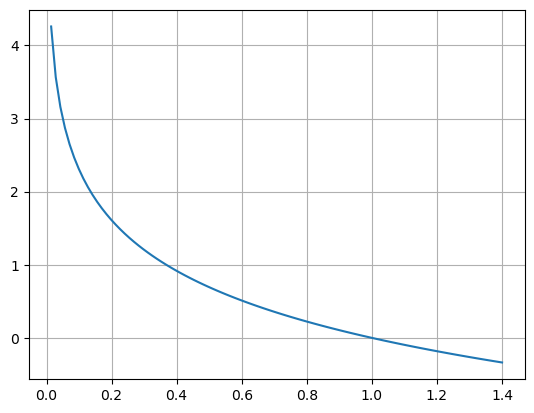

In [14]:

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1.4, 100)
y = -np.log(x)

plt.grid()
plt.plot(x, y)

So we want a model that minimizes the negative log-likelihood loss which basically means maximizing the probabilities of all the bigrams.

### Let's apply it to our dataset

In [15]:
neg_log_likelihood = 0
n = 0

print('bigram: probability log')
for w in words:
	w = ["."] + list(w) + ["."]
	for ch1, ch2 in zip(w, w[1:]):
		p = P[ctoi[ch1], ctoi[ch2]]
		log_prob = -torch.log(p)

		print(f'{ch1}{ch2}: {p:.3f} {log_prob:.3f}')

		neg_log_likelihood += log_prob
		n += 1

print(f'Total: {neg_log_likelihood}')
print(f'Normalized total: {neg_log_likelihood/n}')


bigram: probability log
.e: 0.048 3.041
em: 0.038 3.279
mm: 0.025 3.677
ma: 0.390 0.942
a.: 0.196 1.630
.o: 0.012 4.398
ol: 0.078 2.551
li: 0.178 1.728
iv: 0.015 4.187
vi: 0.354 1.038
ia: 0.138 1.980
a.: 0.196 1.630
.a: 0.138 1.983
av: 0.025 3.704
va: 0.250 1.388
a.: 0.196 1.630
.i: 0.018 3.993
is: 0.074 2.599
sa: 0.148 1.909
ab: 0.016 4.137
be: 0.248 1.396
el: 0.159 1.839
ll: 0.096 2.340
la: 0.188 1.672
a.: 0.196 1.630
.s: 0.064 2.746
so: 0.066 2.726
op: 0.012 4.425
ph: 0.199 1.615
hi: 0.096 2.346
ia: 0.138 1.980
a.: 0.196 1.630
.c: 0.048 3.034
ch: 0.188 1.671
ha: 0.295 1.222
ar: 0.096 2.340
rl: 0.033 3.426
lo: 0.050 3.004
ot: 0.015 4.208
tt: 0.067 2.701
te: 0.129 2.051
e.: 0.195 1.635
.m: 0.079 2.535
mi: 0.189 1.665
ia: 0.138 1.980
a.: 0.196 1.630
.a: 0.138 1.983
am: 0.048 3.032
me: 0.123 2.094
el: 0.159 1.839
li: 0.178 1.728
ia: 0.138 1.980
a.: 0.196 1.630
.h: 0.027 3.601
ha: 0.295 1.222
ar: 0.096 2.340
rp: 0.001 6.810
pe: 0.192 1.650
er: 0.096 2.345
r.: 0.108 2.222
.e: 0.048 3.041


Note you have an edge case where probability is 0. That gives us infinity log-likelihood. We can do model smoothing by adding a small probability to everything.